In [1]:
#Read Data
import pandas as pd
df_train= pd.read_csv('C:/Users/User/codveda_tasks/Task1_Level2_LogisticRegression/churn-bigml-80.csv')
df_test= pd.read_csv('C:/Users/User/codveda_tasks/Task1_Level2_LogisticRegression/churn-bigml-20.csv')


In [2]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
#Handle Missing Values.

print(df_train.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [5]:
print(df_test.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [6]:
# return the unique types or labels of iris
df_train['Churn'].unique()


array([False,  True])

C:\Users\User\AppData\Local\Temp\ipykernel_15656\1101379086.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_train, palette='viridis')


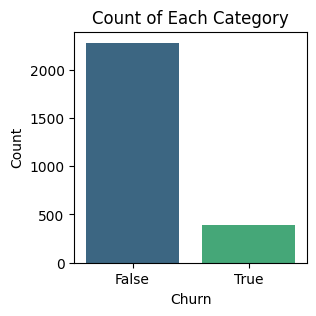

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a countplot
plt.figure(figsize=(3,3))
sns.countplot(x='Churn', data=df_train, palette='viridis')
plt.title('Count of Each Category')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [8]:
# we noticed thier is imbalanced data, so we need to solve that
#pre-process-1
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
X_train = df_train.drop('Churn', axis=1) # axis=1 specifies dropping a column
y_train = df_train['Churn']

print("Original class distribution:", Counter(y_train))

# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
print("Oversampled class distribution:", Counter(y_over))


Original class distribution: Counter({False: 2278, True: 388})
Oversampled class distribution: Counter({False: 2278, True: 2278})


In [9]:
#preprocess-2
#Second process method ( one hot encoding for categorical features)
from sklearn.preprocessing import OneHotEncoder
# Specify the columns to one-hot encode
columns_to_encode = ['State', 'International plan',	'Voice mail plan']

# Initialize OneHotEncoder
# handle_unknown='ignore' handles categories not seen during fit
# sparse_output=False ensures a dense array output
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Fit and transform the selected columns
encoded_features = encoder.fit_transform(X_train[columns_to_encode])

# Create a DataFrame from the encoded features with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
df_final = pd.concat([X_train.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df_final)

      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
2661              79        415                      0              134.7   
2662             192        415                     36              156.2   
2663              68        415                      0              231.1   
2664              28        510                      0              180.8   
2665              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

In [10]:
print(df_final.isnull().sum())

Account length            0
Area code                 0
Number vmail messages     0
Total day minutes         0
Total day calls           0
                         ..
State_WY                  0
International plan_No     0
International plan_Yes    0
Voice mail plan_No        0
Voice mail plan_Yes       0
Length: 71, dtype: int64


In [11]:
X_test = df_test.drop('Churn', axis=1) # axis=1 specifies dropping a column
y_test = df_test['Churn']


In [12]:
# one-Hot for testing data
# Fit and transform the selected columns
X_test_transformed  = encoder.transform(X_test[columns_to_encode])

# Create a DataFrame from the encoded features with appropriate column names
test_encoded_df = pd.DataFrame(X_test_transformed , columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
test_df_final = pd.concat([X_test.drop(columns=columns_to_encode), test_encoded_df], axis=1)

print(test_df_final)

     Account length  Area code  Number vmail messages  Total day minutes  \
0               117        408                      0              184.5   
1                65        415                      0              129.1   
2               161        415                      0              332.9   
3               111        415                      0              110.4   
4                49        510                      0              119.3   
..              ...        ...                    ...                ...   
662             114        415                     26              137.1   
663             106        408                     29               83.6   
664              60        415                      0              193.9   
665             159        415                      0              169.8   
666             184        510                      0              213.8   

     Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0        

In [13]:
print(test_df_final.isnull().sum())

Account length            0
Area code                 0
Number vmail messages     0
Total day minutes         0
Total day calls           0
                         ..
State_WY                  0
International plan_No     0
International plan_Yes    0
Voice mail plan_No        0
Voice mail plan_Yes       0
Length: 71, dtype: int64


In [15]:
#label encoder for label data(train&test)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train= le.fit_transform(y_train)   # Fit on train
y_test = le.transform(y_test)  

In [17]:
y_train

array([0, 0, 0, ..., 0, 0, 0], shape=(2666,))

In [18]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create model
model = LogisticRegression(max_iter=100)

# Train
model.fit(df_final, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Predict
y_pred = model.predict(test_df_final)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8605697151424287
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       572
           1       0.55      0.13      0.21        95

    accuracy                           0.86       667
   macro avg       0.71      0.55      0.56       667
weighted avg       0.82      0.86      0.82       667



In [23]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [24]:
print("\nPrecision (weighted average):", precision_score(y_test, y_pred, average='weighted'))



Precision (weighted average): 0.8249055176428698


In [25]:
print("Recall (weighted average):", recall_score(y_test, y_pred, average='weighted'))


Recall (weighted average): 0.8605697151424287
